In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.linear_model import Lasso
import random

In [2]:
#Setting Random Variables
N = 1000
K = 200
signal2noise = 0.003
coefs = np.random.normal(size=K)
alphas = np.exp(np.linspace(np.log(1e-5), np.log(1e-1), 500))
xcor = 0.85
cov = (1-xcor)*np.diag(np.ones(K)) + xcor*np.ones((K,K))

/opt/anaconda3/envs/work/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 272.62160539779, tolerance: 7.954897805776404
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/envs/work/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 272.6494797440349, tolerance: 7.954897805776404
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/envs/work/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 272.67787386237285, tolerance: 7.954897805776404
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/envs/work/lib/python3.9/site-packages/sklearn/line

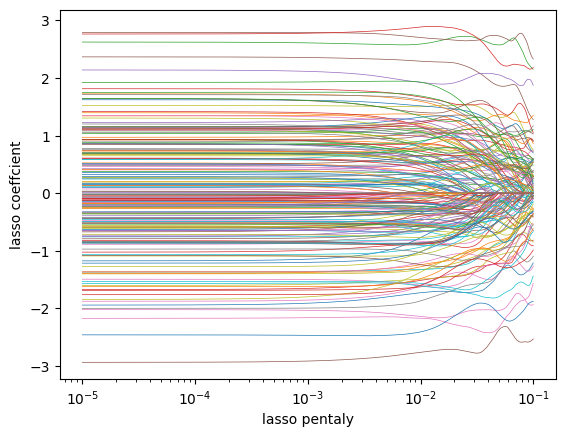

In [3]:
#Regression Time!
X = np.random.multivariate_normal(np.zeros(K), cov, N)
Y = signal2noise*np.random.normal(size=N) + np.dot(X, coefs)
coefs = np.zeros((len(alphas), K))
for idx, alpha in enumerate(alphas):
    coefs[idx, :] = Lasso(alpha=alpha, precompute=True).fit(X, Y).coef_
fig = plt.figure()
for K in range(K):
    plt.plot(alphas, coefs[:, K], '-', lw=0.5)
plt.xlabel('lasso pentaly')
plt.ylabel('lasso coeffcient')
plt.xscale('log')
plt.show()